# 1. 소개
<center>

![](./opencv.PNG)

</center>

- 영상 처리 또는 영상 인식 소스들을 모아 놓은 라이브러리 (https://github.com/opencv/opencv-python)
- 약 2,500개의 영상 처리 알고리즘이 최적화 되어 있어, 활용에 집중할 수 있도록 함
- 알고리즘에 대한 기초적인 이해가 있으면, 커스터마이징도 가능 함

### 설치

In [4]:
# pip 명령 사용
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 설치 후 OpenCV 버전 확인
import cv2
cv2.__version__

'4.6.0'

# 2. 이미지 읽기 (cv2.imread)
### OpenCV로 읽을 수 있는 포맷
- Windows bitmaps - *.bmp, *.dib
- JPEG files - *.jpeg, *.jpg, *.jpe
- JPEG 2000 files - *.jp2
- Portable Network Graphics - *.png
- WebP - *.webp
- Portable image format - *.pbm, *.pgm, *.ppm *.pxm, *.pnm
- Sun rasters - *.sr, *.ras
- TIFF files - *.tiff, *.tif
- OpenEXR Image files - *.exr
- Radiance HDR - *.hdr, *.pic

### flags : 이미지 파일을 읽을 때 옵션
- -1 : 원본 (Unchanged) = cv2.IMREAD_UNCHANGED
- 0  : 단일 채널 (Grayscale) = cv2.IMREAD_GRAYSCALE
- 1  : 3 채널 (BGR color) = cv2.IMREAD_COLOR
- 2  : 16-bit는 16-bit로, 32-bit는 32-bit로, 그 외에는 8-bit
- 16 : 단일 채널 (Grayscale) & 이미지 크기 1/2으로 축소
- 17 : 3 채널 (BGR color) & 이미지 크기 1/2으로 축소
- 32 : 단일 채널 (Grayscale) & 이미지 크기 1/4으로 축소
- 33 : 3 채널 (BGR color) & 이미지 크기 1/4으로 축소
- 64 : 단일 채널 (Grayscale) & 이미지 크기 1/8으로 축소
- 65 : 3 채널 (BGR color) & 이미지 크기 1/8으로 축소

In [3]:
# 이미지 파일 경로
img_dir = 'D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg'
fname = 'hamburg_000000_000042_leftImg8bit.png'

import os
img_gray         = cv2.imread(os.path.join(img_dir, fname), flags =  0)
img_color        = cv2.imread(os.path.join(img_dir, fname), flags =  1)
img_color_reduce = cv2.imread(os.path.join(img_dir, fname), flags = 17)

### cv2.imread 결과
- 이미지 높이(h), 너비(w), 채널(c) 순서로 배열(numpy.ndarray) 리턴

In [36]:
print(0, img_gray.shape) # Gray
print(1, img_color.shape) # BGR
print(17, img_color_reduce.shape) # BGR, Half size

0 (1024, 2048)
1 (1024, 2048, 3)
17 (512, 1024, 3)


### 채널 순서 변경 : BGR -> RGB

In [37]:
# BRG -> RGB로 변경
img_color        = cv2.cvtColor(img_color       , cv2.COLOR_BGR2RGB)
img_color_reduce = cv2.cvtColor(img_color_reduce, cv2.COLOR_BGR2RGB)

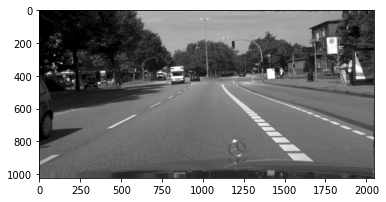

In [38]:
# Grayscale
plt.imshow(img_gray, cmap = 'gray'); plt.show()

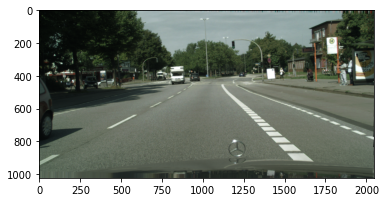

In [39]:
# RGB
plt.imshow(img_color); plt.show()

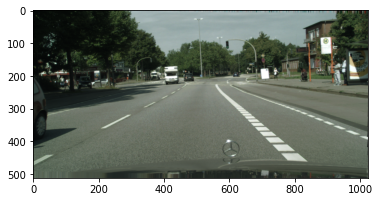

In [40]:
# RGB & Half size
plt.imshow(img_color_reduce); plt.show()

# 3. 이미지 처리
- 다양한 기법의 이미지 변환 방법을 적용해 preprocess (전처리), data augmentation (증식) 등 분석 및 프로젝트의 목적에 적합한 데이터를 취득하도록 처리 가능 함

**A. 더하기**

**B. 필터링 : 블러링, 샤프닝**

**C. 기하학적 변환 : 이동, 크기변환, 회전**

### A. 더하기 (cv2.add, cv2.addWeighted)

In [25]:
base_img.shape

(1024, 2048, 3)

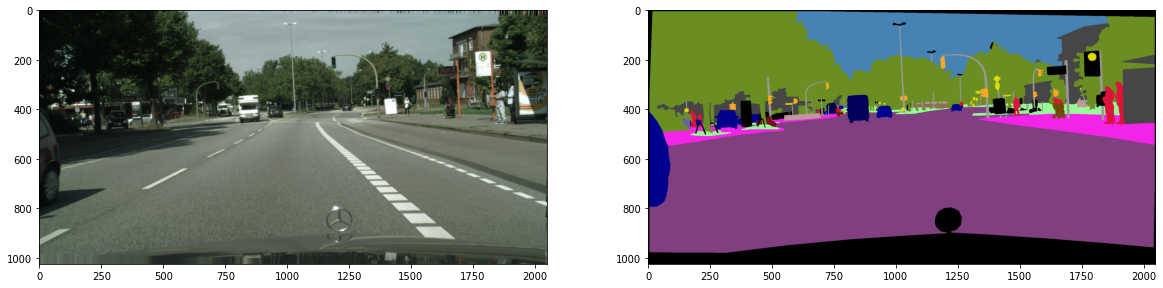

In [24]:
# 이미지 읽기
base_img = cv2.imread(
    "D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg/hamburg_000000_000042_leftImg8bit.png",
    flags = 1 # BGR
)
seg_img = cv2.imread(
    "D:/gtFine_trainvaltest/gtFine/train/hamburg/hamburg_000000_000042_gtFine_color.png",
    flags = 1
)

# BGR -> RGB
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
seg_img  = cv2.cvtColor( seg_img, cv2.COLOR_BGR2RGB)

# 시각화
import matplotlib.pyplot as plt
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, seg_img]): sub.imshow(img)
plt.show()

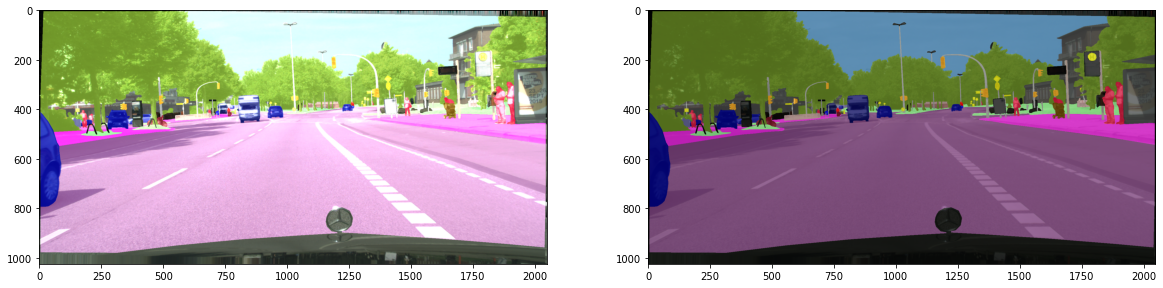

In [4]:
# 합
added_img    = cv2.add(base_img, seg_img)
# 가중합 (원본 25%, 분할라벨 75% 가중치)
weighted_img = cv2.addWeighted(base_img, .25, seg_img, .75, gamma = 0) # gamma : 가중합 결과에 추가적으로 더하는 값

# 시각화
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [added_img, weighted_img]): sub.imshow(img)
plt.show()

### B. 필터링
- 영상/이미지 처리 분야에서 광범위하게 사용 됨
- 딥러닝에서 ***합성곱*** 신경망의 기본 연산은 필터링 개념을 적용한 것

### 블러링 (cv2.blur)
- 평균 필터를 기반으로 이미지를 부드럽게 만드는 기법
- 잡음(노이즈) 제거의 전처리 용도로 사용 됨
- cv2.blur(src, ksize, borderType = 'BORDER_REFLECT_101')
  - src : 입력 이미지
  - ksize : 필터의 크기
  - borderType : 이미지 가장자리를 처리하는 방식
    - BORDER_REFLECT_101 (default) : 대칭 방향의 인접한 픽셀값을 가져 옴
    - BORDER_REPLICATE : 가장 가까운 픽셀의 값으로 채움
    - BORDER_WARP : 가장 멀리 있는 대칭 픽셀값을 가져 옴
    - BORDER_CONSTANT : 주어진 특정 값(default 0)으로 채움

<center>

![](./bordertype.png)

</center>

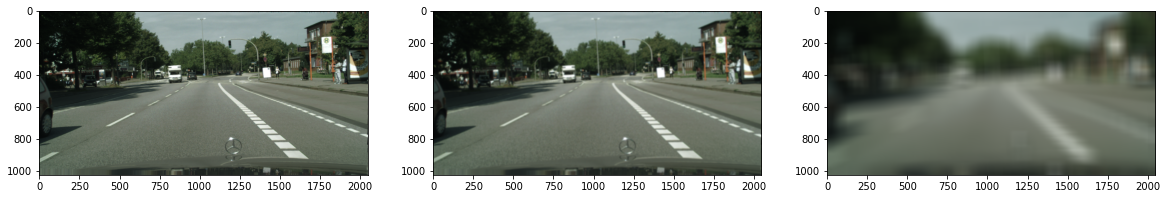

In [27]:
# 블러링
blur9_img  = cv2.blur(base_img, (9, 9))
blur99_img = cv2.blur(base_img, (99, 99))

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, blur9_img, blur99_img]): sub.imshow(img)
plt.show()

### 가우시안 블러링 (cv2.GaussianBlur)
- 앞의 예제는 필터가 모든 픽셀에 동일한 가중치를 적용한 것
- 이 외에 가우시안 필터를 적용하는 방안이 더 많이 사용 됨
- cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType = 'BORDER_REFLECT_101')
  - sigmaX : 가로축의 표준편차 (0이면 필터 사이즈 ksize에 의해 자동으로 결정 됨)
  - sigmaY : 세로축의 표준편차
- 아래의 수식처럼 평균과 분산으로 분포를 표현 함

<center>

$f\left(x|\mu,\sigma\right)=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)$

</center>

- 평균 : 필터의 중앙, 분산 : 주변 픽셀의 기여도
- 가우시안 분포의 값 : 필터의 각 위치(중앙으로부터 거리)에 사용되는 가중치
- 분산이 작을수록 필터 중앙에 위치한 픽셀값의 영향이 커지고,
- 분산이 커질수록 필터 주변에 위치한 픽셀값들의 영향이 커지는 형태

<center>

![](./Normal_Distribution_PDF.svg)

</center>

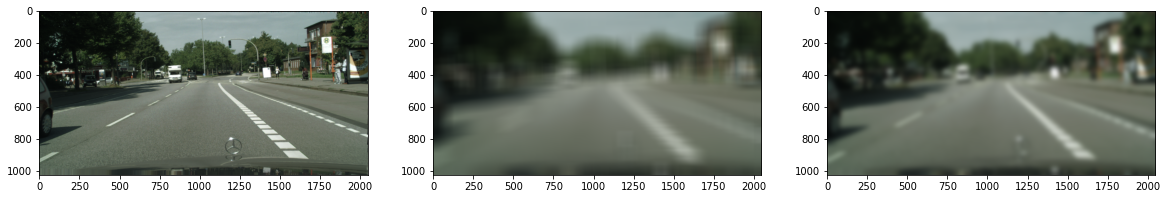

In [12]:
# 블러링
blur99_img = cv2.blur(base_img, (99, 99))
# 가우시안 블러링
gblur_img  = cv2.GaussianBlur(base_img, (99, 99), sigmaX = 0, sigmaY = 0)

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, blur99_img, gblur_img]): sub.imshow(img)
plt.show()

# blur보다 물체의 윤곽이 잘 유지되면서 부드러워짐

### 샤프닝
- 블러링과는 반대로 이미지를 선명하게 만드는 기법
- 주변 픽셀과의 차이를 크게 하여 윤곽을 명확하게 함
- 대표적으로 **언샤프(Unsharp)** 기법이 있음
  - 원본 이미지와 블러링 된 이미지 간의 차이를 이용 함
  - 윤곽 : 주변 픽셀과 값 차이가 큼 -> 블러링 된 픽셀값(주변 픽셀과 평균)이 원래 픽셀값과 차이가 큼

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


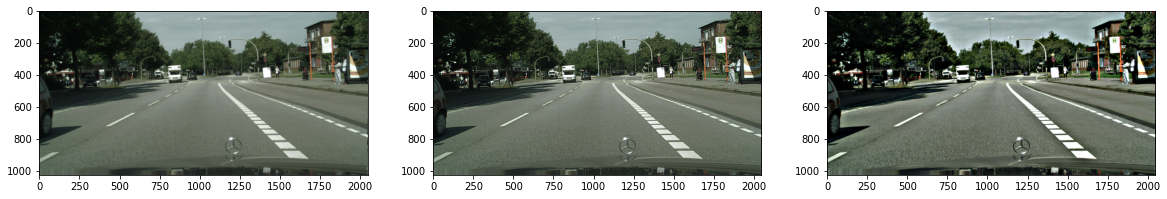

In [28]:
import numpy as np

# 언샤프 기법
unsharp9_img  = cv2.subtract(base_img.astype(np.uint16) * 2, blur9_img.astype(np.uint16))
unsharp99_img = cv2.subtract(base_img.astype(np.uint16) * 2, blur99_img.astype(np.uint16))

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, unsharp9_img, unsharp99_img]): sub.imshow(img)
plt.show()

### C. 기하학적 변환
- 이미지를 구성하는 픽셀의 위치를 조정 함
- 이동, 확대/축소, 회전 등이 있으며, 이를 통틀어 **어파인 변환**(Affine Transformation)이라 함

<center>

$(x^{'}, y^{'}) = T(x, y)$

$
\begin{cases}x^{'} = ax + by + c \\ y^{'} = dx + ey + f\end{cases}
\rightarrow
\begin{pmatrix} x^{'} \\ y^{'} \end{pmatrix}
= \begin{pmatrix} a & b & c \\ d & e & f \end{pmatrix}
\begin{pmatrix} x \\ y \\ 1 \end{pmatrix}
$

</center>

- 어파인 변환 행렬
    - 변환 행렬을 구성하는 a ~ f 값을 통해 다양한 이미지 변환을 수행 함

    - 각 축에 곱해지는 상수(a, e)는 이미지의 **크기** 변환
    ![](./affine_scale.png)

    - 각 축에 더해지는 상수(c, f)는 이미지의 **이동** 변환
    ![](./affine_shift.png)

    - 각각의 축에 곱하고 합하면(a & b, d & e) 이미지의 **회전** 변환
    
    ![](./affine_rotate.png)


### 이동 변환 (cv2.warpAffine)

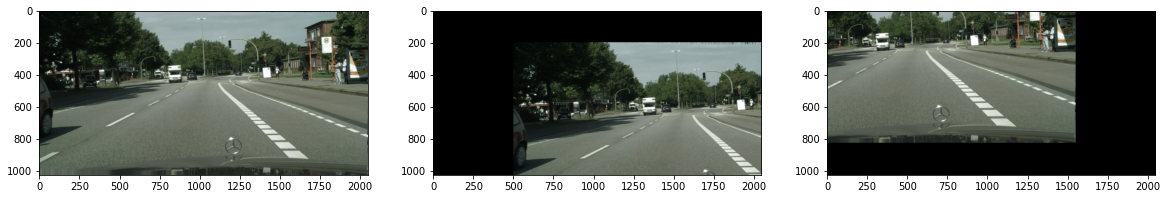

In [14]:
import numpy as np
h, w, c = base_img.shape
# 이동 변환 (x+500, y+200)
shift1_mat = np.float32(
    [[1, 0, 500],
     [0, 1, 200]]
    )
shift1_img = cv2.warpAffine(src = base_img, M = shift1_mat, dsize = (w, h))

# 이동 변환 (x-500, y-200)
shift2_mat = np.float32(
    [[1, 0, -500],
     [0, 1, -200]]
    )
shift2_img = cv2.warpAffine(src = base_img, M = shift2_mat, dsize = (w, h))

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, shift1_img, shift2_img]): sub.imshow(img)
plt.show()

### 크기 변환 (cv2.warpAffine, cv2.resize)

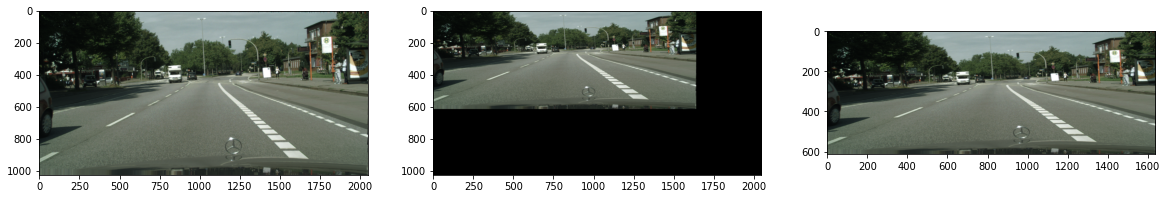

In [22]:
# 크기 변환 (x*0.8, y*0.6)
scale1_mat = np.float32(
    [[0.8, 0, 0],
     [0, 0.6, 0]]
    )
scale1_img = cv2.warpAffine(src = base_img, M = scale1_mat, dsize = (w, h))

# 크기 변환 (x*0.8, y*0.6)
scale2_img = cv2.resize(src = base_img, dsize = (0, 0), dst = None, fx = 0.8, fy = 0.6)

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, scale1_img, scale2_img]): sub.imshow(img)
plt.show()

### 이동 & 크기 변환

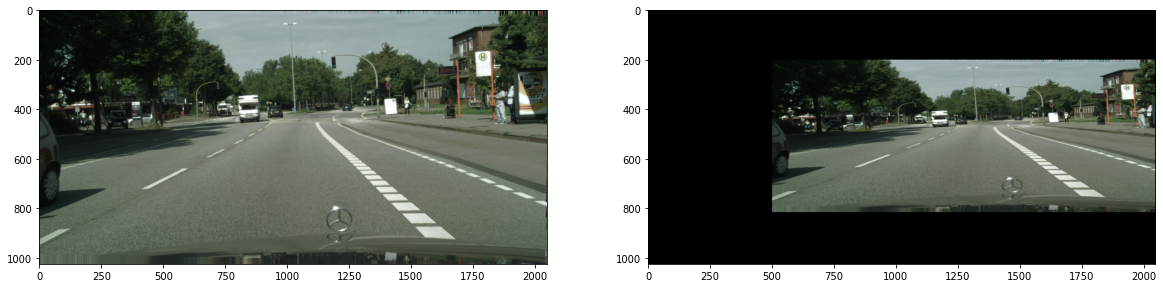

In [19]:
# 이동 & 크기 변환
affine_mat = np.float32(
    [[0.8, 0, 500],
     [0, 0.6, 200]]
    )
affine_img = cv2.warpAffine(src = base_img, M = affine_mat, dsize = (w, h))

# 시각화
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, affine_img]): sub.imshow(img)
plt.show()

### 회전 변환 (cv2.getRotationMatrix2D)

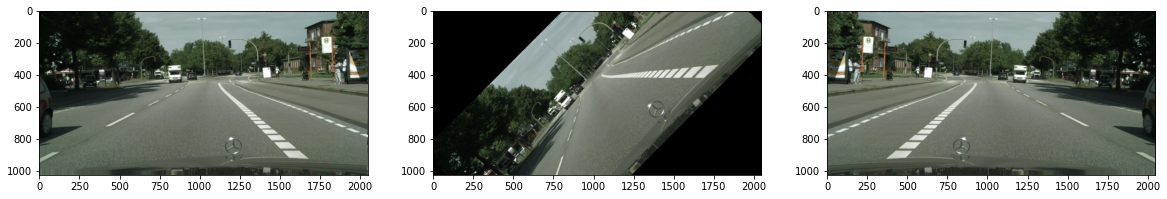

In [23]:
# 회전 변환
rot_mat = cv2.getRotationMatrix2D(center = (w//2, h//2), angle = 45, scale = 1)
rot_img = cv2.warpAffine(src = base_img, M = rot_mat, dsize = (w, h))

# 플립 (0 : 상하반전, 1 : 좌우반전, -1 : 상하좌우반전)
flip_img = cv2.flip(src = base_img, flipCode = 1)

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, rot_img, flip_img]): sub.imshow(img)
plt.show()